# TUTORIAL <span style="color:orange;">***MASAÏ***</span><img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.png" />

Back to the main [Index](Index.ipynb)

## Part 8. 2D EXSY processing

#### Various imports and graphics settings

In [85]:
from __future__ import print_function, division

#### Loading the <span style="color:orange;">***MASAÏ***</span> library

In [86]:
from masai.api import *

#### Set up the general location of data

In [87]:
import os
# You should set the MASAI environnement variable before running these exemples')
# or change the two following paths according to your installation
DATADIR = os.path.join(MASAI,'doc/tutorial/exemples')
FIGDIR = os.path.join(MASAI,'doc/tutorial/figures')

## Load and plot a 2D fid

In [88]:
user = 'user'
name = 'EXSY_TPPI'
expno = 45
path = os.path.join(DATADIR, user,'nmr',name, str(expno))
source = Bruker(path) 
source

***Bruker Source***
- path: /Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial/exemples/user/nmr/EXSY_TPPI/45
- datatype: 2D NMR SER
- pulse program: noesyph
- Encoding: TPPI
- TD1: 256, TD2: 4096
- F1 limits: 0.00 to 7.191 ms
- F2 limits: 0.00 to 246.519 ms

In [89]:
d8 = float(source.par.D[8])*1000.
print("D8 is the mixing time: %.2f ms"%d8)

D8 is the mixing time: 100.00 ms


## Process SER data

#### Process the first dimension

In [90]:
source = Bruker(path) 

# Make a broadening shifted to the TOP of echoes 
# **REMARKS:** This is possible in ``STATES`` mode only (TO CHECK!)

Process(source, transform = 'em 2 --k_shifted 1 0')

# Zerofilling ( zf n : means n times TD)
Process(source, transform = 'zf 2') 

# FT
Process(source, transform = 'ft')

# clip the region of interest
Process(source, transform = 'cl -10 120')

Exponential apodization lb:2.00
Zero-filling to si:16384
Fourier transform with si:16384
clipping along axis -1


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

Manual phasing phc0:-194.00, phc1:10.00, pivot:82.00 
taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


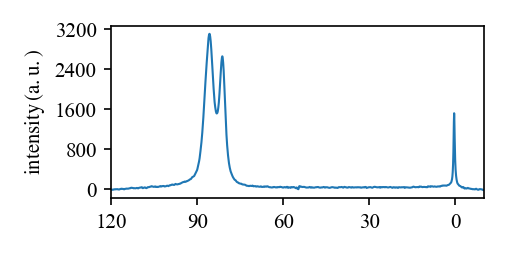

In [91]:
# Manually phasing and plot of the first row to check the phase
Process(source, transform = 'pk -194 10 --pivot 82')
row = source.get_row(0, byindex=True)
p_1 = Plot1d(row, reverse=True)

In [92]:
proc = Process(source, transform = 'pk --interactive --pivot 82')

interactive(children=(FloatSlider(value=-194.0, continuous_update=False, description=u'ph0', max=-149.0, min=-239.0, step=0.001), FloatSlider(value=10.0, continuous_update=False, description=u'ph1', max=20.0, step=0.01), FloatSlider(value=82.0, continuous_update=False, description=u'pivot', max=119.99328368259265, min=-9.985458607208415, step=0.001), Output()), _dom_classes=('widget-interact',))

Manual phasing phc0:-194.00, phc1:10.00, pivot:82.00 


<IPython.core.display.Javascript object>


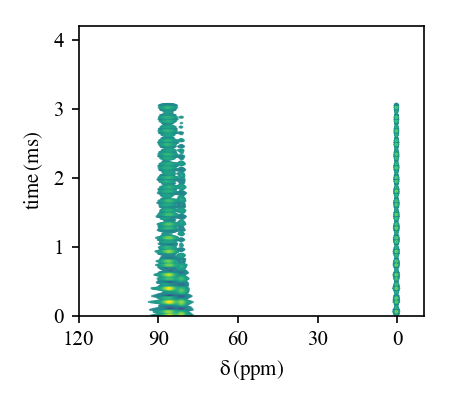

taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


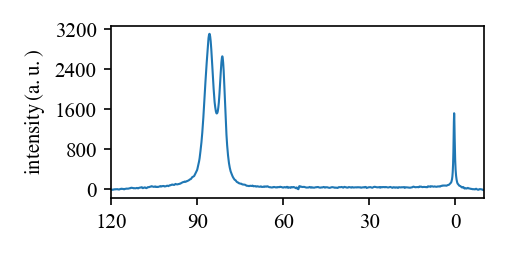

In [93]:
# Apply the above interactive phase 
proc.apply()
Plot2d(source, figsize=(3,2.7), ylim=(0,4.2))
row = source.get_row(0, byindex=True)
_ = Plot1d(row, reverse=True)

#### Process the second dimension

In [94]:
Process(source, axis=0, transform='em 10')
Process(source, axis=0, transform='zf 2') 
Process(source, axis=0, transform='ft')

Exponential apodization lb:10.00
Zero-filling to si:1024
Data transformed according to encoding TPPI
Fourier transform with si:1024


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

In [95]:
# clip the region of interest
Process(source, axis=0, transform = 'cl -10 120')

clipping along axis 0


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

Manual phasing phc0:35.00, phc1:-150.00, pivot:81.00 
taking vertical (axis=0) section by position at 80.88


<IPython.core.display.Javascript object>


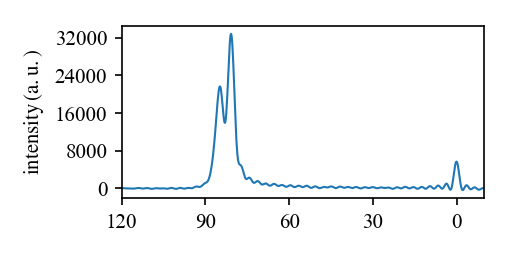

In [96]:
Process(source, axis=0, transform='pk 35 -150 --pivot 81') #manual phasinf first needed
row = source.get_col(80.88, width=0.)
p_1 = Plot1d(row, reverse=True)

In [97]:
proc2 = Process(source, axis=0, transform = 'pk --interactive -.6 81 85 --pivot 81')

interactive(children=(FloatSlider(value=35.0, continuous_update=False, description=u'ph0', max=80.0, min=-10.0, step=0.001), FloatSlider(value=-150.0, continuous_update=False, description=u'ph1', max=-140.0, min=-160.0, step=0.01), FloatSlider(value=81.0, continuous_update=False, description=u'pivot', max=119.92684069624198, min=-9.828920214681318, step=0.001), Output()), _dom_classes=('widget-interact',))

In [98]:
# Apply the above interactive phase 
proc2.apply()

Manual phasing phc0:35.00, phc1:-150.00, pivot:81.00 


<IPython.core.display.Javascript object>


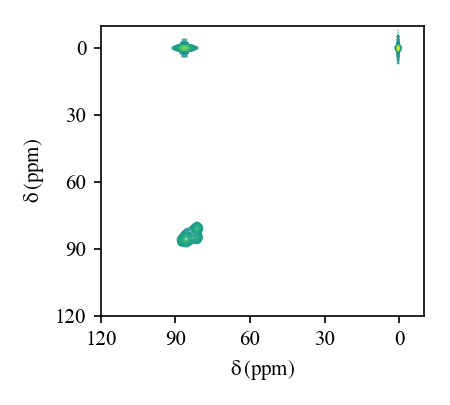

taking vertical (axis=0) section by position at 81.00


<IPython.core.display.Javascript object>


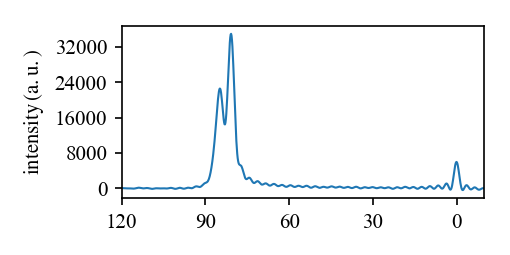

In [99]:
# display 2d
Plot2d(source, figsize=(3,2.7), exponent=1.2, nc=20)
row = source.get_col(81)
_ = Plot1d(row, reverse=True)

Manual phasing phc0:35.00, phc1:-150.00, pivot:81.00 
(1024, 1024)


<IPython.core.display.Javascript object>


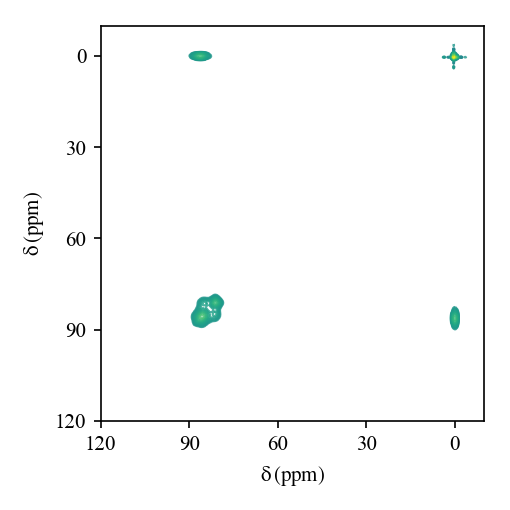

In [100]:
# symetrisation

data = source.data.copy()
index= np.linspace(max(min(data.index), min(data.columns)),min(max(data.index), max(data.columns)),1024)
data = data.reindex(index = index, columns = index, method='nearest')
backup = source.copy()
print(data.shape)
backup.data = data + data.T
Plot2d(backup)